<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Python-Machine-Learning-notebooks/blob/main/Unsupervised_Learning_Iris_KMeans_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning - KMeans

## Iris dataset

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

iris = datasets.load_iris()
print(type(iris))

# Dataset of Iris we see is a "Bunch" class that works similar to a dictionary
print(iris.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
# 4 dimensional

iris.data.shape

(150, 4)

In [ ]:
# iris.data is a numpy array, so we are go to go.

type(iris.data)

numpy.ndarray

## Clustering with KMeans from scikit-learn

KMeans remembers the mean of each cluster ('the centroids'), therefore for new data KMeans can assign to existing clusters.

In [ ]:
from sklearn.cluster import KMeans

samples = iris.data

model = KMeans(n_clusters=3)
model.fit(samples)
labels = model.predict(samples)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

## Scatter plot with colors of clusters

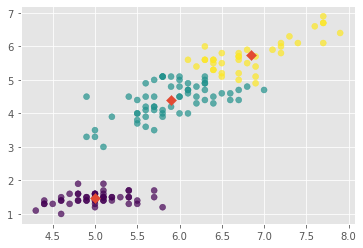

In [ ]:

# on x axis Sepal Length. 0th column of array
xs = samples[:,0]

# on y axis Petal Length. 2nd colum of array
ys = samples[:,2]

# can calculate the coordinates of the cluster centers using model.cluster_centers_
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,2]

# Scatter plot with cluster 
plt.scatter(xs,ys,c=labels,alpha=0.7)
# Also plot centroids
plt.scatter(centroids_x, centroids_y, marker='D',s=50)
plt.show()


In [ ]:
# Model saves the mean of each cluster

model.cluster_centers_


array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

## Evaluating a clustering

In iris set we **know** the dataset corresponds to 3 different species, therefore k in KMeans is natural to be 3.

But what happens when we don't have this type of information?

In iris dataset, do the clusters corresponds to the species?

### Make a crosstab

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# Let's map from integer to species name
iris_series = pd.Series(iris.target)
iris_series.head()

mapping = {0:'setosa', 1:'versicolor', 2:'virginica'}

iris_s = iris_series.map(mapping)

In [ ]:
# Prepare a Data Frame to use Crosstab function

df = pd.DataFrame(labels,columns=['labels'])

df['species'] = iris_s

df

,labels,species
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa
...,...,...
145,2,virginica
146,1,virginica
147,2,virginica
148,2,virginica


In [ ]:
# Not perfect clustering but pretty good

ct = pd.crosstab(df['labels'],df['species'])
ct

species,setosa,versicolor,virginica
labels,,,
0,50,0,0
1,0,48,14
2,0,2,36


### Measuring clustering quality

A good clustering has tight clusters

Samples in each cluster bunched together (not spread out): Calculate Inertia




#### Inertia (in SciPy it's called distortions)

How far samples are from the centroids of its cluster

Lower values of inertia is better!

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(samples)
model.inertia_


78.85144142614601

#### Elbow plot of inertias

Inertia alone doesn't give a good parameter of clustering quality.

How to choose a good number of clusters for a dataset using the k-means inertia graph?


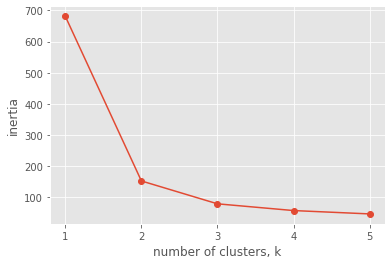

In [ ]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# k=3 seems the best choice

## Scaling with StandardScaler from sklearn

### Scaling no pipeline

#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(samples)

StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(samples)

#### Normalize

In [ ]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(samples)

### Scalers and KMeans in pipeline

### IMPORTANT: Try the most important scalers StandardScaler, MaxAbsScaler and Normalizer

**In this Dataset StandardScaler show a decrease in accuracy of prediction, while Normalizer increases accuracy substantially.**

What Normalizer() does is rescaling each sample (each row) independently of the other.



In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

model = KMeans(n_clusters=3)
scaler = Normalizer()

# With make_pipeline we dont need to create a dictionary
pipeline = make_pipeline(scaler, model)

pipeline.fit(samples)

labels = pipeline.predict(samples)
labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
# Make a crosstab for new labels on recent modeling

df['labels'] = labels

ct = pd.crosstab(df['labels'],df['species'])
ct

species,setosa,versicolor,virginica
labels,,,
0,50,0,0
1,0,5,50
2,0,45,0


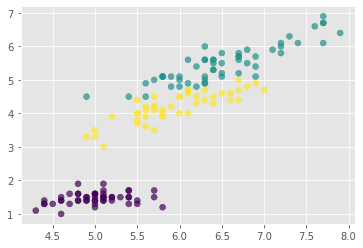

In [ ]:

# on x axis Sepal Length. 0th column of array
xs = samples[:,0]

# on y axis Petal Length. 2nd colum of array
ys = samples[:,2]

# Scatter plot with clusters by color
plt.scatter(xs,ys,c=labels,alpha=0.7)

plt.show()

# Visualization techniques

## Hierarchical clustering with SciPy

Plot of hierarchical clustering is called a dendrogram

Distance between clusters (y axis of dendrogram) is computed by a **"linkage method"**

In Complete linkage: distance between clusters is max distance between their samples.
In single linkage, the distance between clusters is the distance between the closest points of the clusters.



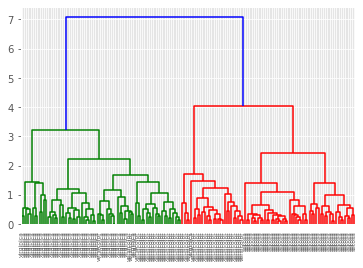

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(samples, method='complete')

dendrogram(mergings, labels=df['species'].values, leaf_rotation=90,leaf_font_size=6) 
plt.show()


Hierarchical clustering with SciPy (cont.)

with fcluster() we can select intermediate clustering filtering by distance.

In our Dendrogram we can select a hight of 2.5 and you'll have 4 clusters. fcluster() returns a NumPy array of cluster labels.



In [ ]:
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 2.5,criterion='distance')

# Cluster labels starts at 1 in SciPy!
display(labels)

# You may crosstab this output
df['labels_fcluster'] = labels

ct = pd.crosstab(df['labels_fcluster'],df['species'])
ct

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2,
       3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 1, 2, 2, 1, 3, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

species,setosa,versicolor,virginica
labels_fcluster,,,
1,0,0,12
2,0,23,37
3,0,27,1
4,50,0,0


## t-SNE

"t-distributed stochastic neighbor embedding"

Very simple purpose: It transforms high-dimensional spaces into a 2- or 3-dimensional space so thay can be visualized.

Iris is a 4-dimensional datased. t-SNE maps samples into 2D space

Axes in t-SNE doesn't have a meaning

In [ ]:
# Transform species into colors for t-SNE

mapping_colors= {'setosa':'b','virginica':'g', 'versicolor':'r'}

colors = pd.Series(df['species'].values)
plot_colors = colors.map(mapping_colors)

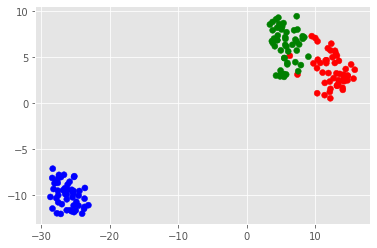

In [ ]:
from sklearn.manifold import TSNE

# Learning rate is a hyperparameter
# normally try values between 50 and 200.
model = TSNE(learning_rate=100)

# Use normalized_movements !!!!!!!!!!!
transformed = model.fit_transform(normalized_movements)

xs = transformed[:,0]
ys = transformed[:,1]

plt.scatter(xs,ys,c=plot_colors)
plt.show()

# Dimension reduction

More efficient storage and computation.

Remove less-informative 'noise' features with causes problems for prediction tasks.

## PCA: Decorrelation

Fundamental technique calles Principal Component Analysis

1st: Decorrelation. Shifts data so they have mean 0 and decorrelates between features. 

2nd: Reduces dimensions

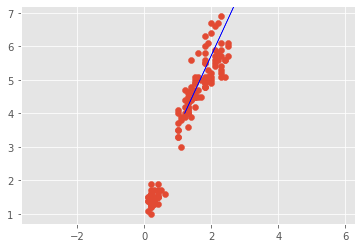

The correlation between this two features are: 0.962865431402796


In [ ]:
# We calculate correlation between petal length and petal width 

from scipy.stats import pearsonr 

# I create a DataFrame with column names
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

width = iris_df['petal width (cm)']
length = iris_df['petal length (cm)']

# Scatter plot width vs length
plt.scatter(width, length)
plt.arrow(1.2, 4, 2.3, 5, color='b', width=0.01)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print('The correlation between this two features are: {}'.format(correlation))



In [ ]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# First decorrelation with PCA.

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(iris_df)

# Can also transform new samples
transformed = pca.transform(iris_df)

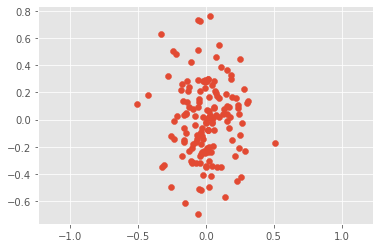

The correlation between this two features are: -7.632783294297951e-17


In [ ]:
#Control decorrelation

width = transformed[:,3]
length = transformed[:,2]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print('The correlation between this two features are: {}'.format(correlation))

## PCA: Dimension reduction

Intrinsic dimension = number of features needed to approximate the dataset

What is the most compact representatio of the samples?. 

Can be detected with PCA

Iris dataset has intrinsic dimension: 2!, even when we have 4 features.

Intrinsic dimension is the number of PCA features with significant variance.

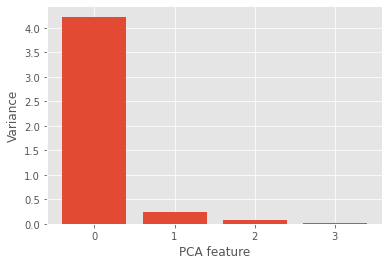

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(iris_df)

features = range(pca.n_components_)
variance = pca.explained_variance_

plt.bar(features, variance)
plt.xticks(features)
plt.ylabel('Variance')
plt.xlabel('PCA feature')
plt.show()

## Complete Scaler/PCA Pipeline

### Pipeline

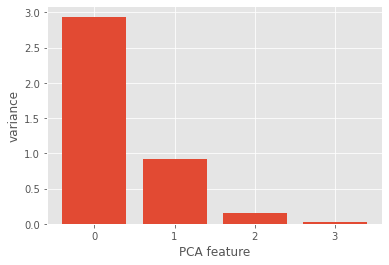

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

### Keeping only the important features with PCA



In [ ]:

# Here I choose only 2 features

scaler = Normalizer()

# Create a PCA with only 2 features!!!!!
pca = PCA(n_components=2)

# Create pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

transformed = pipeline.transform(samples)

# We see we only have two features now
transformed.shape


(150, 2)

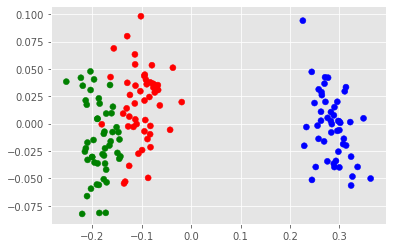

In [ ]:
# Plot with only 2 dimensions

xs = transformed[:,0]
ys = transformed[:,1]

plt.scatter(xs,ys,c=plot_colors)
plt.show()

# Remember the mapping of colors: 
#{'setosa':'b','virginica':'g', 'versicolor':'r'}

## PCA for tf-idf matrices (NLP)

TfidfVectorizer from sklearn transforms a list of documents into a word frequency array, which it outputs as a csr_matrix

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. 

We now are going to create a pipeline for this reduction with TruncatedSVD + KMeans

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))


# NMF (Non-negative matrix factorization)

PCA doesn't learn parts
Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images.

## For TF-IDF (Documents, NLP)


Same as PCA but easier to understand.

Unlike PCA, the desired n_components must be specified

Values of samples **must not be negative!!!!**

Works with csr_matrix

In [ ]:
from sklearn.decomposition import NMF

model = NMF(n_components=2)

model.fit(samples)

# Transform the articles: nmf_features
nmf_features = model.transform(tfidf_samples)

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=labels)
df

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)


# Select row 3: one component
component = components_df.iloc[3]

# Print result of nlargest that is the largest components (parameters) 
# to multiply then by the matrix of nmf_features. This is for the 3rd row
print(component.nlargest())

## For images

In [ ]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13, 8))

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Select the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

#This is digit_features
<script.py> output:
    [4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
     4.81559442e-01 0.00000000e+00 7.37557191e-16

## Building recommender systems using NMF and Cosine Similarity

Online newspaper

Recommend articles similar to article being read by customer

Somos articles should have similar topics

Apply NMF to the tf-idf (word-frequency array)

Similar articles should have similar NMF features

In the video, you learned how to use NMF features and the cosine similarity to find similar articles. Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo. The NMF features you obtained earlier are available as nmf_features, while titles is a list of the article titles.

In [ ]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

### Recommend musical artists

Recommend musical artists part I
In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array artists whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, MaxAbsScaler, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. In the next exercise, you'll use the resulting normalized NMF features for recommendation!

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

Recommend musical artists part II
Suppose you were a big fan of Bruce Springsteen - which other musicial artists might you like? Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists. A solution to the previous exercise has been run, so norm_features is an array containing the normalized NMF features as rows. The names of the musical artists are available as the list artist_names.

In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

<script.py> output:
    Bruce Springsteen    1.000000
    Neil Young           0.955896
    Van Morrison         0.872452
    Leonard Cohen        0.864763
    Bob Dylan            0.859047
    dtype: float64

# If I want the components parameter: nmf.components_
# n_components_integer
#The number of components. It is same as the n_components parameter if
# it was given. Otherwise, it will be same as the number of features.